In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import matplotlib
import logging

import utils as utils
from matplotlib import cm

In [2]:
runname = 'debug_withC_rogers_netcdfBdy1_EB_soliton_f_withsponge_focus_finey_summer'
datafilepath = '/Volumes/Tan_2023/projects_backup/SUNTANS/HPC/'+runname+'/data/'

# datafilename = 'sun_out.nc_0000.nc'
datafilename = 'sun_sparse.nc_0000.nc'

# path to saved result
resultfilepath = datafilepath[:-5] + 'mfiles/results/'
# path to saved figures
outfilepath = '../figure/'
if not os.path.exists(resultfilepath):
    os.mkdir(resultfilepath)
if not os.path.exists(outfilepath):
    os.mkdir(outfilepath)

param_data = {
    "datafilepath": datafilepath,
    "netcdf_filename": datafilename,
            }
param_result = {
    "resultfilepath": resultfilepath,
    "result_filename": 'sun_out_energy_derived.nc',
            }
idx_end = -15

# Read data

In [3]:
data = xr.open_dataset(param_result['resultfilepath']+param_result['result_filename'])

In [4]:
data

<xarray.Dataset> Size: 29GB
Dimensions:       (time: 171, x: 1814, y: 1314, z: 100)
Coordinates:
  * x             (x) float64 15kB 40.01 212.6 385.0 ... 1.45e+05 1.451e+05
  * y             (y) float64 11kB 40.01 180.1 319.9 ... 1.05e+05 1.051e+05
  * z             (z) float64 800B -1.311 -3.973 -6.674 ... -576.0 -587.2 -598.7
  * time          (time) datetime64[ns] 1kB 2013-01-01T12:00:08 ... 2013-01-0...
Data variables:
    dEp0          (time, x, y) float64 3GB ...
    dEp_prime     (time, x, y) float64 3GB ...
    dEk0          (time, x, y) float64 3GB ...
    dEk_prime     (time, x, y) float64 3GB ...
    C_int         (time, x, y) float64 3GB ...
    D0            (time, x, y) float64 3GB ...
    D_prime       (time, x, y) float64 3GB ...
    depth         (x, y) float64 19MB ...
    dissip0       (time, x, y) float64 3GB ...
    dissip_prime  (time, x, y) float64 3GB ...
Attributes:
    title:    SUNTANS internally calculated energy budget

# Island center & Shoaling depth

In [10]:
lambdaM2=70.1e3
l_sponge = 20e3
L=1.5*lambdaM2+2*l_sponge
W=1.5*lambdaM2

x_c = 2*l_sponge+1.5*lambdaM2/2 
y_c = W/2

In [11]:
depth_top = 4
depth_shoal = 180
depth_bottom = 600-1e-2

# Dissipation

## overhead view

In [7]:
dissip0 = data.dissip0
dissip_prime = data.dissip_prime

In [8]:
# spatially filter dissipation; running mean, binsize = N
N = 10
dissip_prime_filter = dissip_prime[-1,:,:].data.copy()
dissip_0_filter = dissip0[-1,:,:].data.copy()
for i in range(len(data.x)):
    dissip_prime_filter[i,:] = np.convolve(dissip_prime_filter[i,:], np.ones(N)/N, 'same')
    dissip_0_filter[i,:] = np.convolve(dissip_0_filter[i,:], np.ones(N)/N, 'same')
for j in range(len(data.y)):
    dissip_prime_filter[:,j] = np.convolve(dissip_prime_filter[:,j], np.ones(N)/N, 'same')
    dissip_0_filter[:,j] = np.convolve(dissip_0_filter[:,j], np.ones(N)/N, 'same')

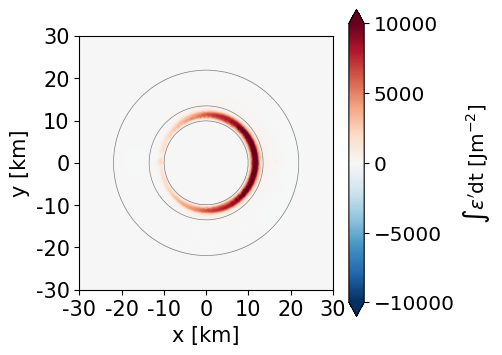

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
# im1 = dissip0[-1,:,:].T.plot.pcolormesh(ax=ax, vmax=1e4, vmin=-1e4, cmap=cm.RdBu_r, add_colorbar=False)
im1 = ax.pcolormesh(data.x.data, data.y.data, dissip_prime_filter.T, vmax=1e4, vmin=-1e4, cmap=cm.RdBu_r)
cb1 = plt.colorbar(im1, location='right', extend='both')
cb1.set_label(label=r"$\int\epsilon'$dt [Jm$^{-2}$]", size='x-large')
cb1.ax.tick_params(labelsize='x-large')
ax.contour(data.x.data, data.y.data, data.depth.data.T, levels = [depth_top, depth_shoal, depth_bottom], colors='0.5', linewidths=.5)

ax.set_xlim([x_c-30000, x_c+30000])
ax.set_ylim([y_c-30000, y_c+30000])
ax.set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
ax.set_yticks(np.arange(y_c-30000,y_c+30000+1,10000))
ax.set_xticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_yticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_aspect('equal')
ax.set_xlabel('x [km]', fontsize=15)
ax.set_ylabel('y [km]', fontsize=15)
ax.set_title(f'')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()

plt.savefig(outfilepath+ f"dissip_prime_overhead_summer_f.jpeg", dpi=300)

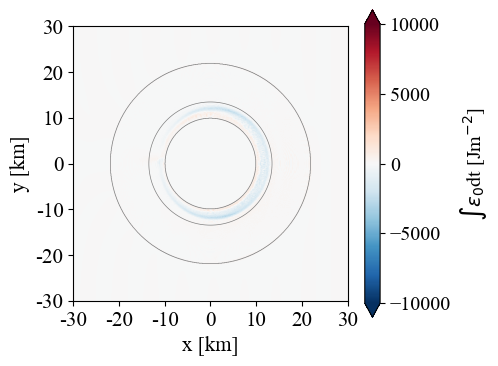

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
# im1 = dissip0[-1,:,:].T.plot.pcolormesh(ax=ax, vmax=1e4, vmin=-1e4, cmap=cm.RdBu_r, add_colorbar=False)
im1 = ax.pcolormesh(data.x.data, data.y.data, dissip_0_filter.T, vmax=1e4, vmin=-1e4, cmap=cm.RdBu_r)
cb1 = plt.colorbar(im1, location='right', extend='both')
cb1.set_label(label=r"$\int\epsilon_0$dt [Jm$^{-2}$]", size='x-large')
cb1.ax.tick_params(labelsize='x-large')
ax.contour(data.x.data, data.y.data, data.depth.data.T, levels = [depth_top, depth_shoal, depth_bottom], colors='0.5', linewidths=.5)

ax.set_xlim([x_c-30000, x_c+30000])
ax.set_ylim([y_c-30000, y_c+30000])
ax.set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
ax.set_yticks(np.arange(y_c-30000,y_c+30000+1,10000))
ax.set_xticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_yticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_aspect('equal')
ax.set_xlabel('x [km]', fontsize=15)
ax.set_ylabel('y [km]', fontsize=15)
ax.set_title(f'')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()

plt.savefig(outfilepath+ f"dissip_0_overhead_summer_f.jpeg", dpi=300)

## area integration

In [21]:
dissip_rate = (dissip0+dissip_prime).differentiate("time",datetime_unit="s")

In [22]:
# change to radial coordinate
dis_c = np.zeros((len(data.x), len(data.y)))
for i in range(len(data.x)):
    for j in range(len(data.y)):
        dis_c[i,j] = np.sqrt((data.x[i].data-x_c)**2+(data.y[j].data-y_c)**2)
        
theta_c = np.zeros((len(data.x), len(data.y)))
for i in range(len(data.x)):
    for j in range(len(data.y)):
        theta_c[i,j] = np.arctan2(data.y[j].data-y_c, data.x[i].data-x_c)

In [23]:
dis_top = np.mean(np.where((data.depth>=depth_top-.5) & (data.depth.data<=depth_top+.5)))
dis_shoal = np.mean(dis_c[np.where((data.depth>=depth_shoal-1) & (data.depth.data<=depth_shoal+1))])
dis_bottom = np.mean(dis_c[np.where((data.depth>=depth_bottom-1) & (data.depth.data<depth_bottom))])
quadrants_info = {
    "r_quad": np.array([dis_shoal,dis_bottom]),
    "quadrants": ['east', 'north', 'west', 'south'],
    "theta_quad": [[-45, 45], [45, 135], [135, -135], [-135, -45]]
            }

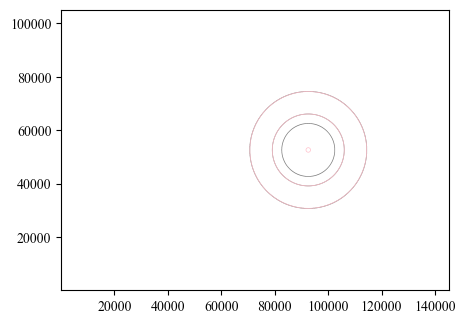

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax.contour(data.x.data, data.y.data, data.depth.data.T, levels = [depth_top, depth_shoal, depth_bottom], colors='0.5', linewidths=.5)
ax.contour(data.x.data, data.y.data, dis_c.T, levels = [dis_top, dis_shoal, dis_bottom], colors='pink', linewidths=.5)
ax.set_aspect('equal')

In [27]:
# mask out data outside of the rings  
mask_ring = (dis_c>=dis_top) & (dis_c<quadrants_info["r_quad"][0])
mask_ring_east = mask_ring & (theta_c>=quadrants_info["theta_quad"][0][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][0][1]*np.pi/180)
mask_ring_north = mask_ring & (theta_c>=quadrants_info["theta_quad"][1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][1][1]*np.pi/180)
mask_ring_west = mask_ring & ((theta_c>=quadrants_info["theta_quad"][2][0]*np.pi/180) | (theta_c<quadrants_info["theta_quad"][2][1]*np.pi/180))
mask_ring_south = mask_ring & (theta_c>=quadrants_info["theta_quad"][-1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][-1][1]*np.pi/180)

dissp_rate_int_inner = np.zeros((4, len(data.time)))
dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_east] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[0,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_north] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[1,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_west] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[2,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_south] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[-1,:] = dissp_rate_out_.integrate('y')*1e-6

In [28]:
# mask out data outside of the rings  
mask_ring = (dis_c>=quadrants_info["r_quad"][0]) & (dis_c<quadrants_info["r_quad"][-1])
mask_ring_east = mask_ring & (theta_c>=quadrants_info["theta_quad"][0][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][0][1]*np.pi/180)
mask_ring_north = mask_ring & (theta_c>=quadrants_info["theta_quad"][1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][1][1]*np.pi/180)
mask_ring_west = mask_ring & ((theta_c>=quadrants_info["theta_quad"][2][0]*np.pi/180) | (theta_c<quadrants_info["theta_quad"][2][1]*np.pi/180))
mask_ring_south = mask_ring & (theta_c>=quadrants_info["theta_quad"][-1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][-1][1]*np.pi/180)

dissp_rate_int_outter = np.zeros((4, len(data.time)))
dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_east] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[0,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_north] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[1,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_west] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[2,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_south] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[-1,:] = dissp_rate_out_.integrate('y')*1e-6

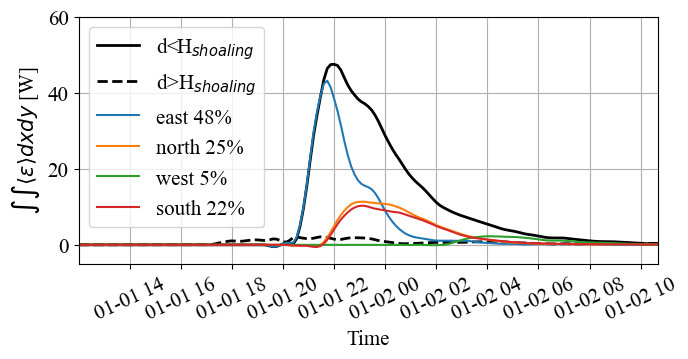

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.7))
ax.plot(data.time, np.sum(dissp_rate_int_inner,axis=0), c='k', lw=2, label='d<H$_{shoaling}$')
ax.plot(data.time, np.sum(dissp_rate_int_outter,axis=0), c='k', ls='--', lw=2, label='d>H$_{shoaling}$')
for i in range(4):
    ax.plot(data.time, dissp_rate_int_inner[i,:], label=quadrants_info['quadrants'][i]+' '+str(int(np.round(np.trapz(dissp_rate_int_inner[i,:])/np.trapz(np.sum(dissp_rate_int_inner,axis=0))*100)))+'%')
ax.legend(fontsize=15, ncol=1, loc='upper left')
ax.set_ylim([-5,60])
ax.set_xlim([data.time[0].data,data.time[-1].data])
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel(r"$\int\int\langle \epsilon\rangle dxdy$ [W]", fontsize=15)
# ax.set_ylabel(r"$\int\int(\overline{\epsilon}+\overline{D})dxdy$ [W]", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='x', rotation = 25)
ax.set_title('')
ax.grid()
plt.tight_layout()
# for idx_t in np.arange(20,40+1,5):
#     ax.plot([data.time[idx_t].data, data.time[idx_t].data], [-65, 5], '.5')
# for idx_t in np.arange(45,80,5):
#     ax.plot([data.time[idx_t].data, data.time[idx_t].data], [-65, 5], 'pink')
plt.rcParams["font.family"] = "Times New Roman"  

plt.savefig(outfilepath+ f"dissp_rate_areaintegrate_quadrants_summer_f.jpeg", dpi=300)